In [45]:
import sys
import os

import spotipy
import json
import pprint
import pandas as pd
import configparser
import seaborn as sns
import matplotlib.pyplot as plt


import spotipy.oauth2 as oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [46]:
#Authenticate with config file and spotipy client_id, client_secret, username, values

config = configparser.ConfigParser()
config.read('config_ernflerberg.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')
username = config.get('SPOTIFY', 'USERNAME')


auth = oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)

token = auth.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [47]:
playlistDictionary={"Liked": "37i9dQZF1DWY4xHQp97fN6",
                   "Dislike": "37i9dQZF1DWWEJlAGA9gs0"
                   }

In [48]:
#Pull 'Like' Playlist (https://open.spotify.com/user/ernflerberg/playlist/67hGWrUlSHm47BmDWPHIZD?si=6ygnOWyCTMajdAY3vFM5BA)
#User's liked playlist id: 67hGWrUlSHm47BmDWPHIZD



uri = 'spotify:user:spotifycharts:playlist:67hGWrUlSHm47BmDWPHIZD'
username = username

liked_playlist_id = "67hGWrUlSHm47BmDWPHIZD"
liked_results = spotify.user_playlist(username, liked_playlist_id)


#Pull 'Dislike' Playlist (https://open.spotify.com/user/ernflerberg/playlist/67hGWrUlSHm47BmDWPHIZD?si=6ygnOWyCTMajdAY3vFM5BA)
#User's disliked playlist id: 7I2vgcXF2DBLsmC7EqahC0?si=MI4T0e1UQd-ftV0tWHp_1A

uri = 'spotify:user:ernflerberg:playlist:7I2vgcXF2DBLsmC7EqahC0'
username = username


disliked_playlist_id = "7I2vgcXF2DBLsmC7EqahC0" #add the last part of the playlist url here. https://open.spotify.com/user/ernflerberg/playlist/67hGWrUlSHm47BmDWPHIZD?si=6ygnOWyCTMajdAY3vFM5BA

disliked_results = spotify.user_playlist(username, disliked_playlist_id)


In [49]:
#Check that the 'Liked' playlist connects to a song
liked_results['tracks']['items'][0]['track']['id']

'1g5CHtsDQl7KVWaUiAwat0'

In [50]:
#Check that the 'Disliked' playlist connects to a song
disliked_results['tracks']['items'][0]['track']['id']

'35RDmXJ59YYGNlv1KfTGsP'

In [51]:
#Pull the 'Liked' playlist track information using the Spotipy API JSON 
ldf = []
for i in liked_results['tracks']['items']:
    ldf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ldf = pd.DataFrame(ldf)  
#Add column names for the "Liked" Playlist
ldf.columns = ['song_id','added_at','Artist','Album','Durastion_ms','Song','Popularity']
#Add column "user_preference" to the Liked Playlist
ldf['user_preference'] = 1
ldf.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity,user_preference
0,1g5CHtsDQl7KVWaUiAwat0,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,237533,Lycanthrope,40,1
1,1VpTwecl7EbQiGyVsvwFQE,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,192786,When Your Heart Stops Beating,52,1
2,4isP4utvgJyHHp1iYOAMQQ,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,211613,"No, It Isn't",40,1
3,1zBFEYEwHKCahttaE2mhg7,2019-03-20T05:01:06Z,311,311 (Deluxe Version),172053,Down,51,1
4,18ZOH3KKu5Elt5ysocFyX4,2019-03-20T05:01:06Z,311,311,179600,All Mixed Up,59,1


In [52]:
#Pull the 'Disiked' playlist track information using the Spotipy API JSON
ddf = []
for i in disliked_results['tracks']['items']:
    ddf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ddf = pd.DataFrame(ddf)  
#Add column names for the "Disliked" Playlist
ddf.columns = ['song_id','added_at','Artist','Album','Durastion_ms','Song','Popularity']
#Add column "user_preference" to the Disliked Playlist
ddf['user_preference'] = 0
ddf.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity,user_preference
0,35RDmXJ59YYGNlv1KfTGsP,2019-04-24T06:21:44Z,SZA,Power is Power,211266,Power is Power,85,0
1,40Zb4FZ6nS1Hj8RVfaLkCV,2019-04-24T06:22:07Z,French Montana,Slide (feat. Blueface & Lil Tjay),186344,Slide (feat. Blueface & Lil Tjay),79,0
2,3tTV4DYlhkiXRNiiXwIAPf,2019-04-24T06:22:18Z,Madonna,Medellín (with Maluma),298164,Medellín (with Maluma),79,0
3,10RQKVSr4rS0coExTmi4dF,2019-04-24T06:23:39Z,Carrie Underwood,Greatest Hits: Decade #1,238173,Something in the Water,59,0
4,20DfkHC5grnKNJCzZQB6KC,2019-04-24T06:23:43Z,Carrie Underwood,Blown Away,205560,Good Girl,59,0


In [53]:
sp = spotipy.Spotify(auth=token)

In [54]:
#Pull Audio Features from Spotipy on song_id for Liked playlist
laf = []
for i in ldf.song_id:
    x = sp.audio_features(i)
    laf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
laf = pd.DataFrame(laf)

laf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Liked Audio Features and track information together
lpaf = pd.merge(ldf, laf, on='song_id')
lpaf.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1g5CHtsDQl7KVWaUiAwat0,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,237533,Lycanthrope,40,1,0.363,0.989,9,-2.361,0,0.0942,0.000037,0.000000,0.0687,0.467,168.015,4
1,1VpTwecl7EbQiGyVsvwFQE,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,192786,When Your Heart Stops Beating,52,1,0.420,0.968,9,-2.353,0,0.1230,0.000232,0.000000,0.0796,0.392,171.004,4
2,4isP4utvgJyHHp1iYOAMQQ,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,211613,"No, It Isn't",40,1,0.482,0.640,9,-4.695,1,0.0244,0.021000,0.000000,0.2120,0.450,95.030,4
3,1zBFEYEwHKCahttaE2mhg7,2019-03-20T05:01:06Z,311,311 (Deluxe Version),172053,Down,51,1,0.440,0.935,6,-6.304,0,0.0692,0.000165,0.000002,0.3200,0.578,175.253,4
4,18ZOH3KKu5Elt5ysocFyX4,2019-03-20T05:01:06Z,311,311,179600,All Mixed Up,59,1,0.760,0.702,10,-9.404,0,0.0716,0.010400,0.000000,0.3800,0.659,92.324,4


In [55]:
#Pull Audio Features from Spotipy on song_id for Disliked playlist
daf = []
for i in ddf.song_id:
    x = sp.audio_features(i)
    daf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
daf = pd.DataFrame(daf)

daf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Disliked Audio Features and track information together
dpaf = pd.merge(ddf, daf, on='song_id')
dpaf.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35RDmXJ59YYGNlv1KfTGsP,2019-04-24T06:21:44Z,SZA,Power is Power,211266,Power is Power,85,0,0.507,0.644,4,-7.485,1,0.0641,0.00413,0.000000,0.2170,0.1720,179.913,4
1,40Zb4FZ6nS1Hj8RVfaLkCV,2019-04-24T06:22:07Z,French Montana,Slide (feat. Blueface & Lil Tjay),186344,Slide (feat. Blueface & Lil Tjay),79,0,0.532,0.704,5,-3.895,0,0.2600,0.09300,0.000000,0.1840,0.5910,96.004,4
2,3tTV4DYlhkiXRNiiXwIAPf,2019-04-24T06:22:18Z,Madonna,Medellín (with Maluma),298164,Medellín (with Maluma),79,0,0.820,0.685,1,-7.093,1,0.2880,0.06030,0.000018,0.6710,0.4620,91.980,4
3,10RQKVSr4rS0coExTmi4dF,2019-04-24T06:23:39Z,Carrie Underwood,Greatest Hits: Decade #1,238173,Something in the Water,59,0,0.451,0.893,7,-2.721,1,0.0627,0.02430,0.000000,0.0813,0.0971,139.763,4
4,20DfkHC5grnKNJCzZQB6KC,2019-04-24T06:23:43Z,Carrie Underwood,Blown Away,205560,Good Girl,59,0,0.617,0.839,0,-2.849,0,0.0655,0.02860,0.000000,0.1900,0.7410,128.910,4


In [56]:
#Join Disliked Playlist to Liked Playlist in New Data Frame
df_combined = pd.concat([lpaf, dpaf])
df_combined.head()

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,1g5CHtsDQl7KVWaUiAwat0,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,237533,Lycanthrope,40,1,0.363,0.989,9,-2.361,0,0.0942,0.000037,0.000000,0.0687,0.467,168.015,4
1,1VpTwecl7EbQiGyVsvwFQE,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,192786,When Your Heart Stops Beating,52,1,0.420,0.968,9,-2.353,0,0.1230,0.000232,0.000000,0.0796,0.392,171.004,4
2,4isP4utvgJyHHp1iYOAMQQ,2019-03-20T05:01:06Z,+44,When Your Heart Stops Beating,211613,"No, It Isn't",40,1,0.482,0.640,9,-4.695,1,0.0244,0.021000,0.000000,0.2120,0.450,95.030,4
3,1zBFEYEwHKCahttaE2mhg7,2019-03-20T05:01:06Z,311,311 (Deluxe Version),172053,Down,51,1,0.440,0.935,6,-6.304,0,0.0692,0.000165,0.000002,0.3200,0.578,175.253,4
4,18ZOH3KKu5Elt5ysocFyX4,2019-03-20T05:01:06Z,311,311,179600,All Mixed Up,59,1,0.760,0.702,10,-9.404,0,0.0716,0.010400,0.000000,0.3800,0.659,92.324,4


''

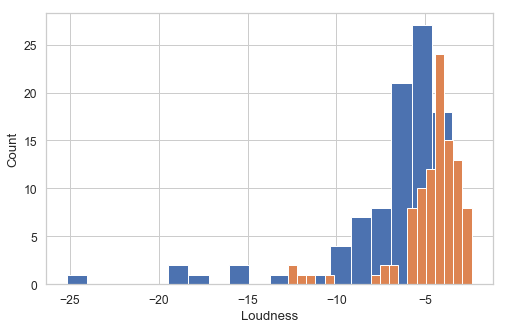

In [70]:
#Trying to query for user_preference = 1 vs 0

likesongq = df_combined.query("user_preference == 1") 
dislikesongq = df_combined.query("user_preference == 0")

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    likesongq['loudness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Loudness', ylabel='Count')